In [1]:
import pandas as pd
import h5py
from pathlib import Path
import logging
import logging.config
import yaml
import h5py
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import  array_to_img, img_to_array

import storage
import extraction

%matplotlib inline

Using TensorFlow backend.


In [2]:
def setupLogging():
    with open('../config/logConfig.yml', 'rt') as file:
        config = yaml.safe_load(file.read())
        logging.config.dictConfig(config)

In [3]:
setupLogging()

In [6]:
# Reads captions and images stored in the validate/train hdf5 files from start_index to end_index
def read_file(set_name, start_index, end_index): 
      
    file_nb = storage.get_file_numbers(start_index, end_index)

    for nb in range(file_nb[0], file_nb[1]+1):
        file_path, lock_path = storage.get_path(set_name, nb)
        start_idx = nb * storage.get_file_size() if nb > file_nb[0] else start_index
        end_idx = (nb + 1) * storage.get_file_size() if nb < file_nb[1] else end_index

        for idx in range(start_idx, end_idx):
            try:
                status, image, caption = storage.read_image(set_name, idx)  
                if (int(status) == 200):

                    print(image.shape)
                    print(caption)
                    print(image.dtype)

                    x = image.reshape((1,) + image.shape)
                    print(x.shape)
                    plt.imshow(image)
                    plt.show()

            except KeyError:
                # Ignores files not found - probably an HHTP error when requesting the URL
                # Later - Keep count of the minning files to know the exact size of the dataset
                print("Missing index - image not found - probably an HHTP error when requesting the URL " + str(idx))
                continue 
   

    return

(300, 300, 3)
sierra looked stunning in this top and this skirt while performing with person at their former university
uint8
(1, 300, 300, 3)


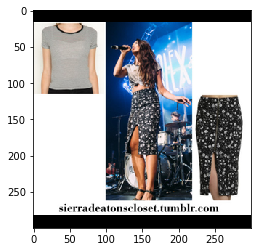

(300, 300, 3)
young confused girl standing in front of a wardrobe
uint8
(1, 300, 300, 3)


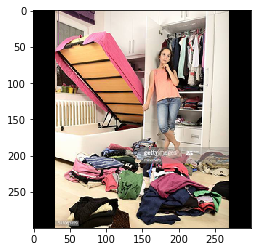

In [7]:
read_file("train", 1, 3)

   

In [9]:
# Reads status stored in the validate/train hdf5 files from start_index to end_index
def read_status(set_name, start_index, end_index): 
      
    file_nb = storage.get_file_numbers(start_index, end_index)
    statuslist = []

    for nb in range(file_nb[0], file_nb[1]+1):
        file_path, lock_path = storage.get_path(set_name, nb)
        start_idx = nb * storage.get_file_size() if nb > file_nb[0] else start_index
        end_idx = (nb + 1) * storage.get_file_size() if nb < file_nb[1] else end_index

        for idx in range(start_idx, end_idx):
            try:
                status, image, caption = storage.read_image(set_name, idx)  
                statuslist.append(int(status))

            except KeyError:
                # Ignores files not found - probably an HHTP error when requesting the URL
                # Later - Keep count of the minning files to know the exact size of the dataset
                print("Missing index - image not found - probably an HHTP error when requesting the URL " + str(idx))
                continue 
   
    return statuslist

200    175
500      5
404      5
403      4
Name: status, dtype: int64


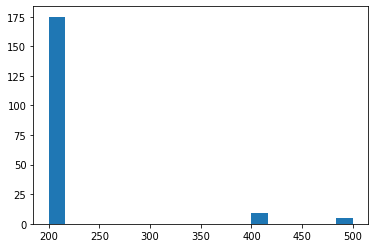

In [14]:
df['status'] = pd.DataFrame(read_status("train", 99910, 100099))
print(df['status'].value_counts())


plt.hist(df["status"], bins = 18)
plt.style.use('ggplot')
plt.show()